<a href="https://colab.research.google.com/github/MuskanMakandar/CodeAlpha_Task03/blob/main/CodeAlpha3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats


In [ ]:
df= pd.read_csv("/content/cardata.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df['Car_Name'].nunique()

98

In [ ]:
df.drop('Car_Name',axis=1,inplace=True)

In [ ]:
df.insert(0,"Age", df["Year"].max()+1-df["Year"])
df.drop('Year',axis=1, inplace=True)
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


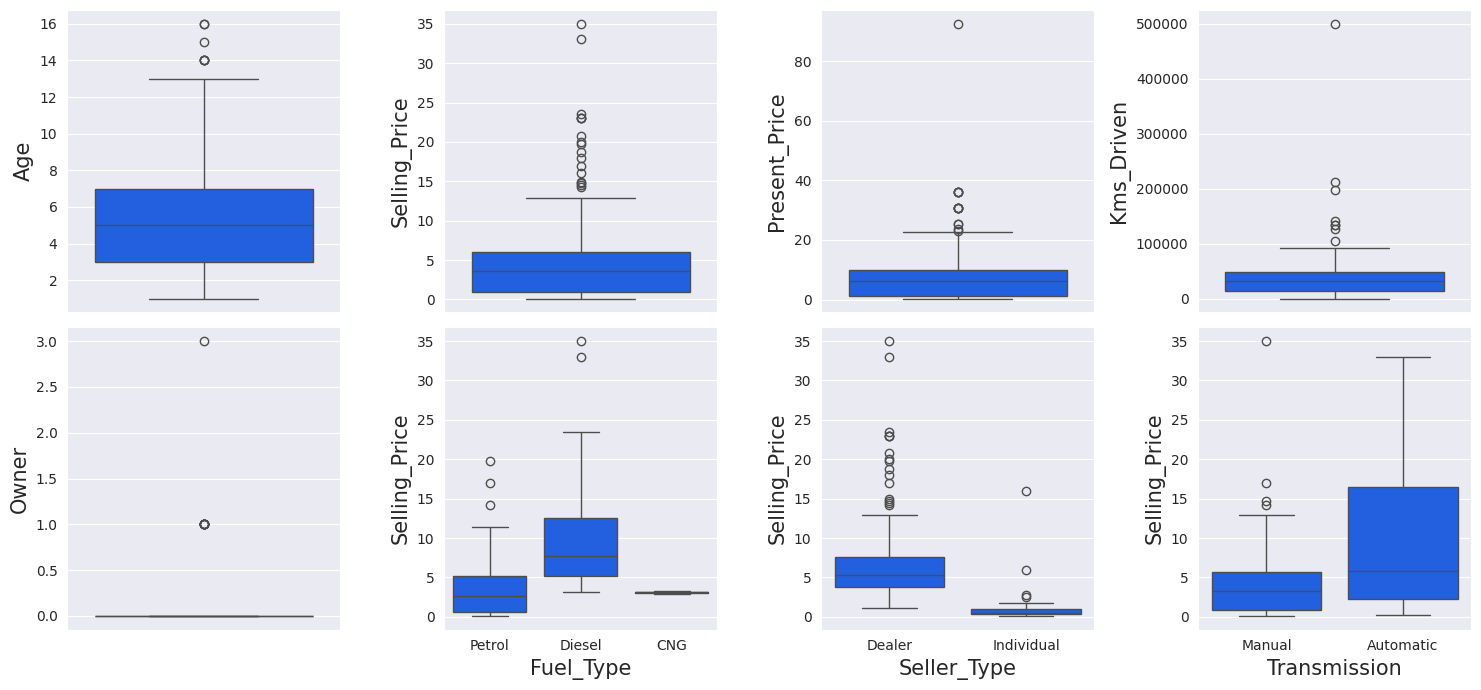

In [ ]:
sns.set_style('darkgrid')
colors=['#0355ff', '#ff7000', '#23bf00']
CustomPalette=sns.set_palette(sns.color_palette(colors))

orderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, df.select_dtypes(include='object').columns.values])
fig , ax= plt.subplots(2,4,figsize=(15,7),dpi=100)

for i,col in enumerate(orderedCols):
  x=i//4
  y=i%4
  if i<5:
    sns.boxplot(data=df , y=col, ax=ax[x,y])
    ax[x,y].yaxis.label.set_size(15)
  else:
    sns.boxplot(data=df , x=col, y='Selling_Price' , ax=ax[x,y])
    ax[x,y].xaxis.label.set_size(15)
    ax[x,y].yaxis.label.set_size(15)
plt.tight_layout()
plt.show()


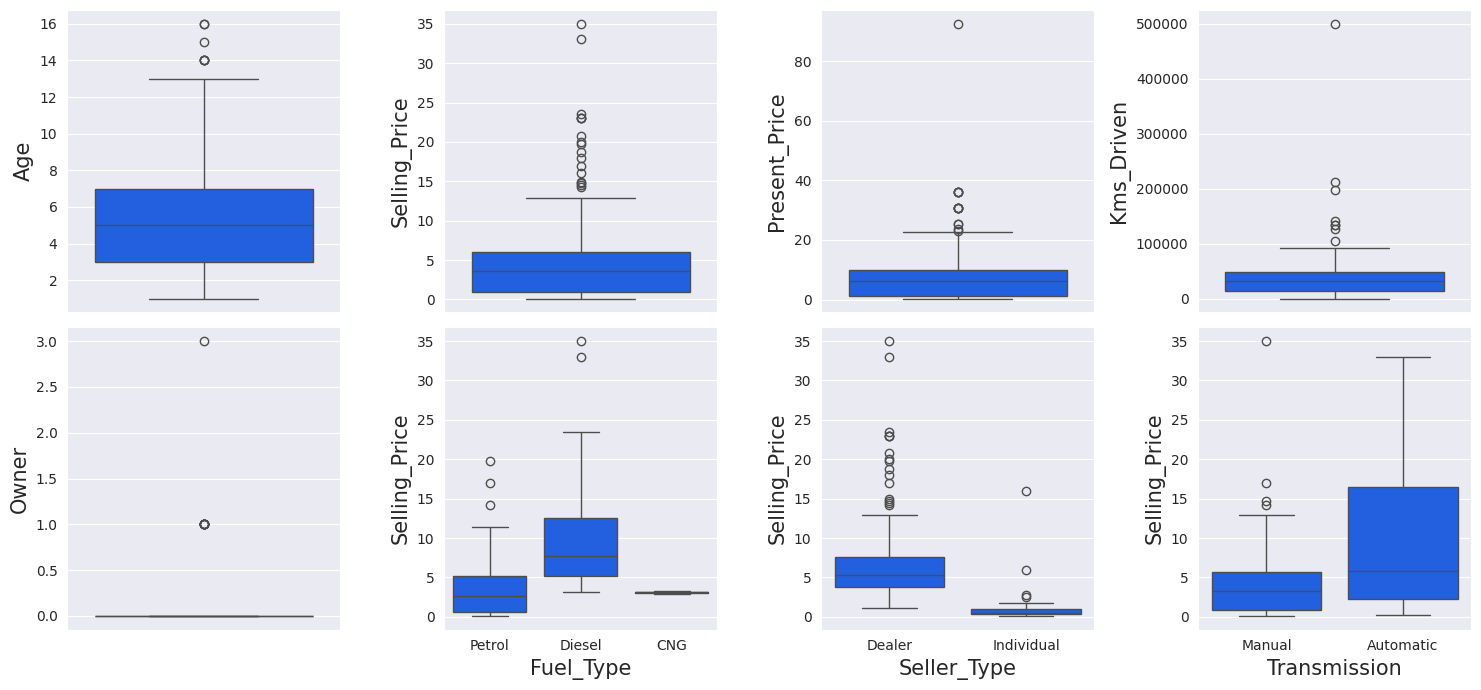

In [ ]:
sns.set_style('darkgrid')
colors=['#0355ff', '#ff7000', '#23bf00']
CustomPalette=sns.set_palette(sns.color_palette(colors))

orderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, df.select_dtypes(include='object').columns.values])
fig , ax= plt.subplots(2,4,figsize=(15,7),dpi=100)

for i,col in enumerate(orderedCols):
  x=i//4
  y=i%4
  if i<5:
    sns.boxplot(data=df , y=col, ax=ax[x,y])
    ax[x,y].yaxis.label.set_size(15)
  else:
    sns.boxplot(data=df , x=col, y='Selling_Price' , ax=ax[x,y])
    ax[x,y].xaxis.label.set_size(15)
    ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()
plt.show()

In [ ]:
outliers_indexes =[]
target = 'Selling_Price'

for col in df.select_dtypes(include='object').columns:
  for cat in df[col].unique():
    df1 = df[df[col]==cat]
    q1= df1 [target].quantile(0.25)
    q3= df1 [target].quantile(0.75)
    iqr=q3-q1
    maximum = q3 +(1.5 * iqr)
    minimum = q3 +(1.5 * iqr)
    outlier_samples = df1[(df1[target]<minimum) | (df1[target]>maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())

for col in df.select_dtypes(exclude='object').columns:
  q1= df1 [target].quantile(0.25)
  q3= df1 [target].quantile(0.75)
  iqr=q3-q1
  outlier_samples = df1[(df1[col]<minimum) | (df1[col]>maximum)]
  outliers_indexes.extend(outlier_samples.index.tolist())

outliers_indexes= list(set(outliers_indexes))
print('{} outliers were identified, whose indices are :\n\n{}'.format(len(outliers_indexes), outliers_indexes))




301 outliers were identified, whose indices are :

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211

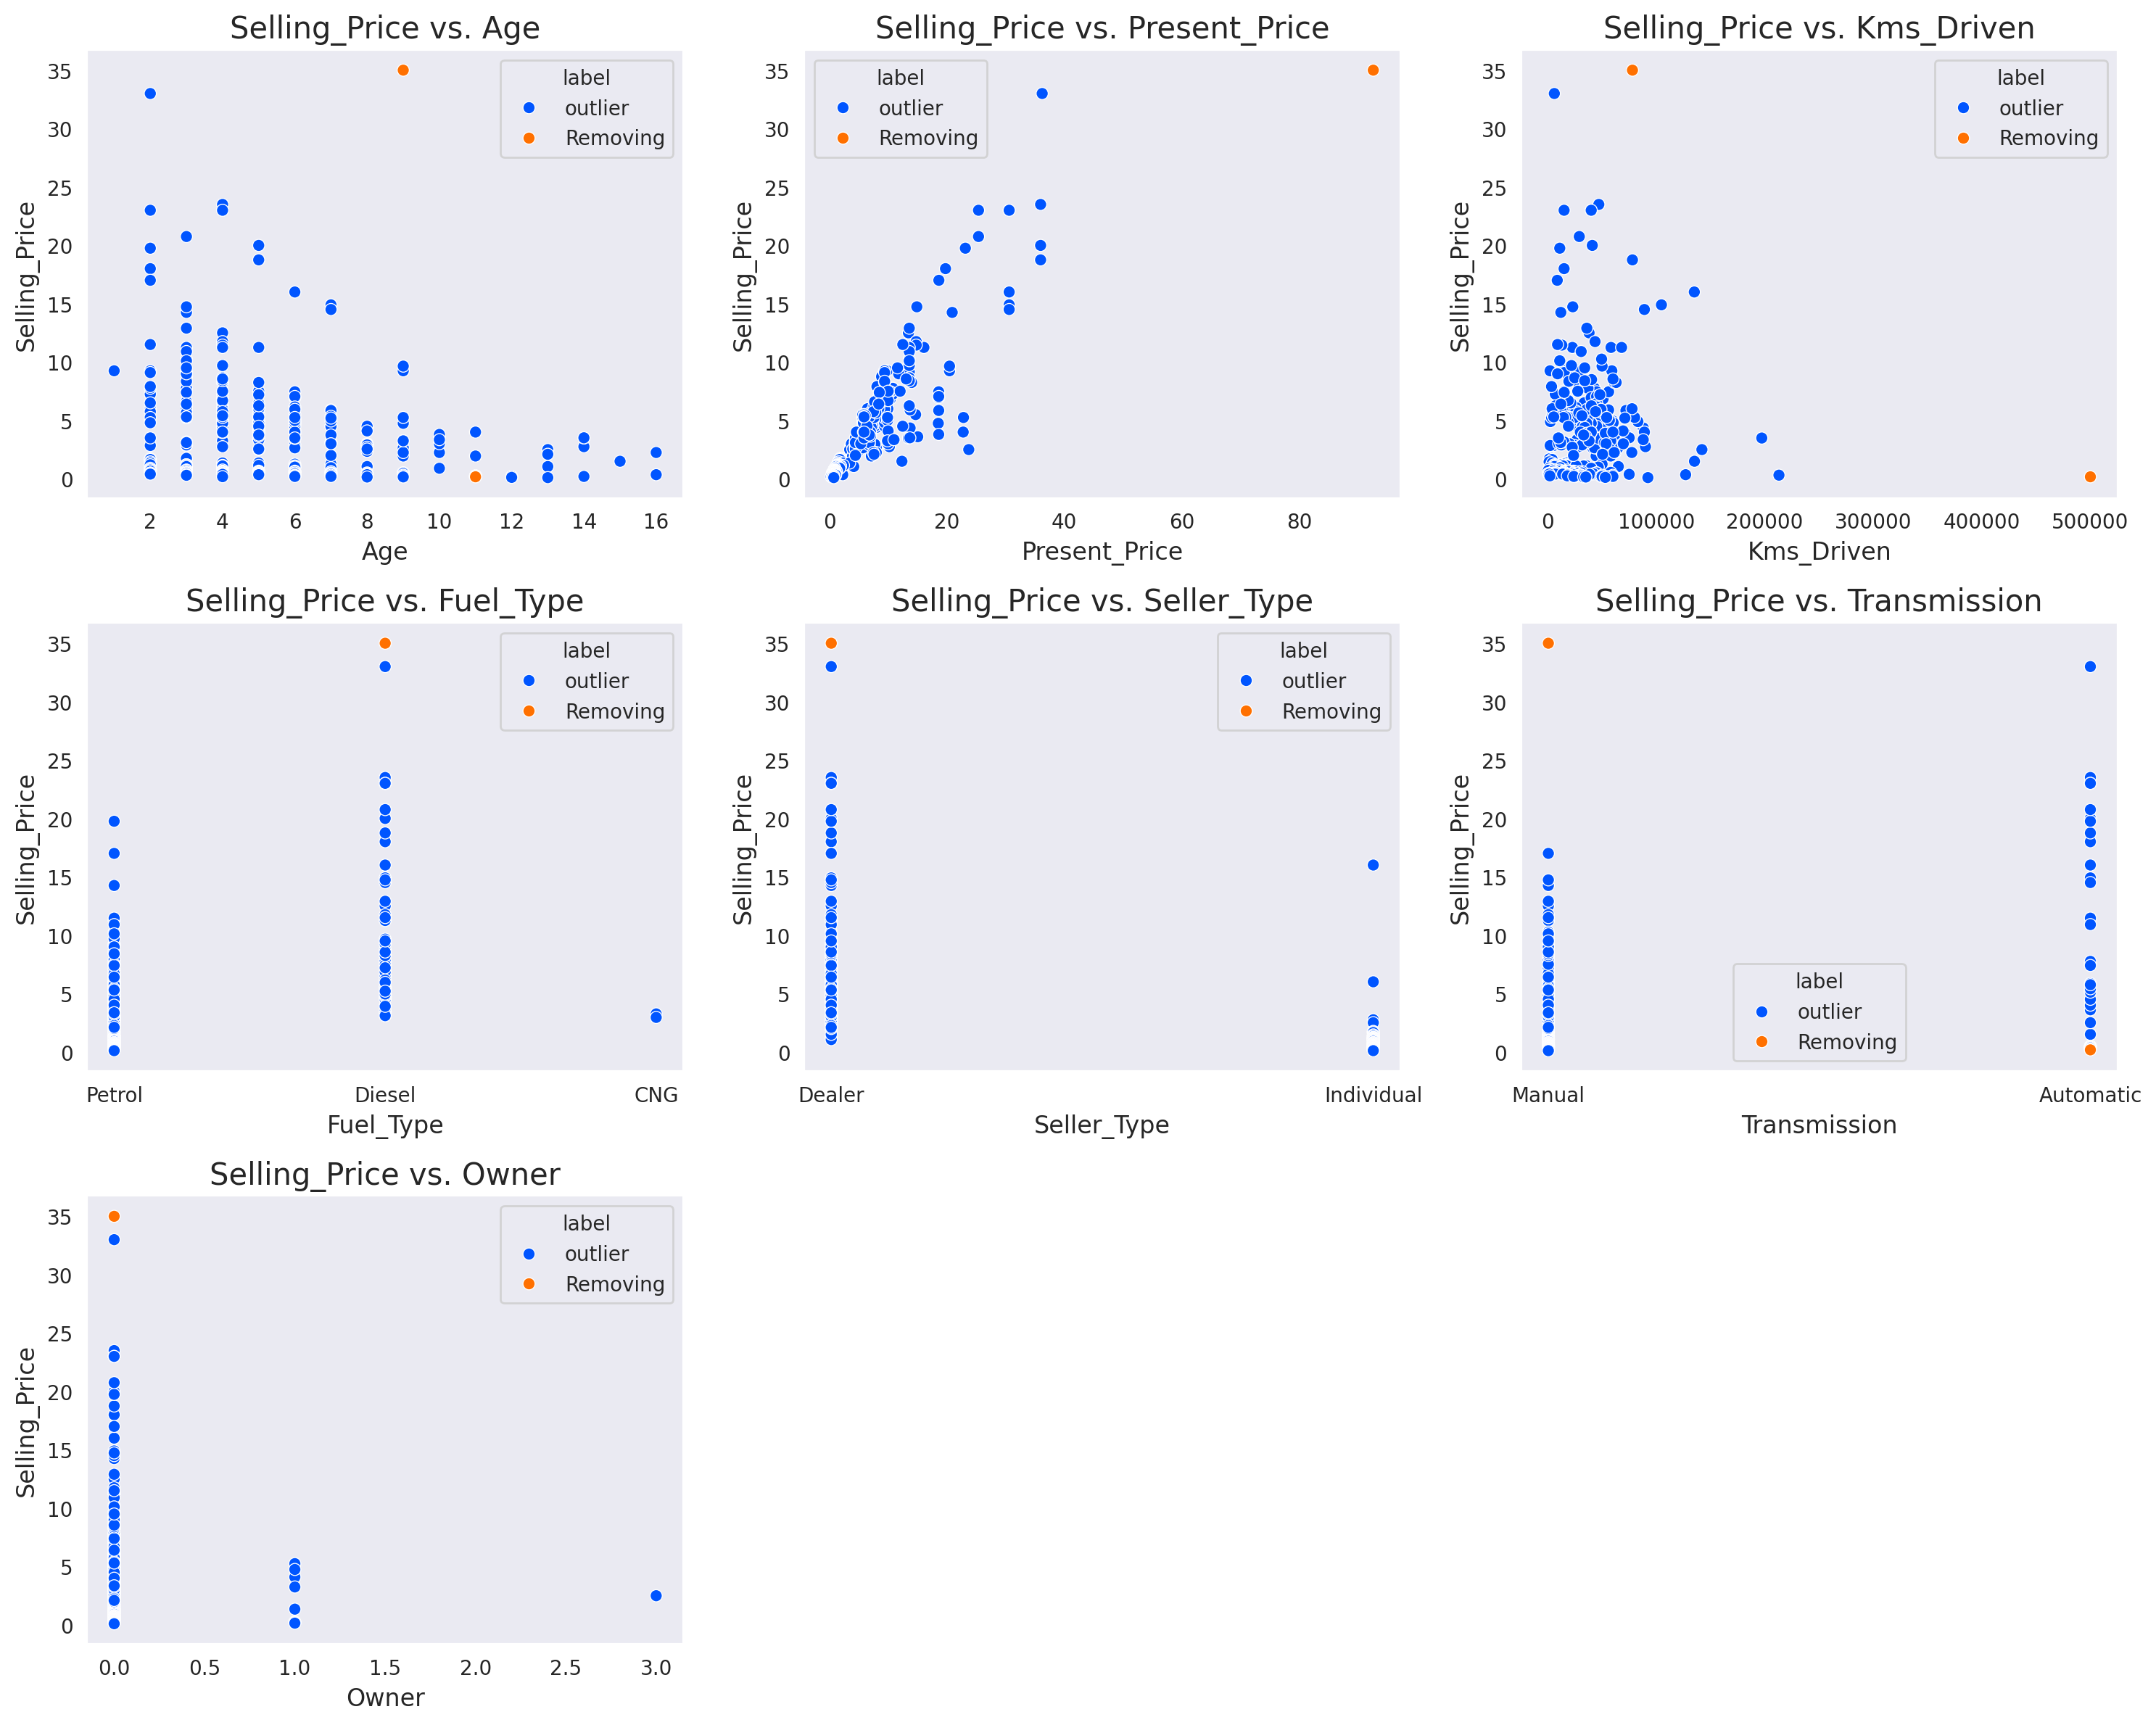

In [ ]:
df1= df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes, 'label']= 'outlier'

removing_indexes =[]
removing_indexes.extend(df1[df1[target]>33].index)
removing_indexes.extend(df1[df1['Kms_Driven']>400000].index)
df1.loc[removing_indexes, 'label']= 'Removing'

target='Selling_Price'
features = df.columns.drop(target)
colors = ['#0055ff' , '#ff7000' , '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig , ax= plt.subplots(nrows=3 , ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
  x=i//3
  y=i%3
  sns.scatterplot(data=df1, x=features[i], y=target, hue='label' , ax=ax[x,y])
  ax[x,y].set_title('{} vs. {}'.format(target, features[i]) , size=15)
  ax[x,y].set_xlabel(features[i], size=12)
  ax[x,y].set_ylabel(target,size=12)
  ax[x,y].grid()

ax[2,1].axis('off')
ax[2,2].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
removing_indexes= list(set(removing_indexes))
removing_indexes

[196, 86]

In [ ]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df[df.duplicated(keep=False)]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,3,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,4,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [ ]:
df1 = df.copy()
df1.drop(removing_indexes, inplace=True)
df1.reset_index(drop=True, inplace=True)

In [ ]:
NumCols = ['Age' , 'Selling_Price', 'Present_Price', 'Kms_Driven','Owner']
CatCols=['Fuel_Type', 'Seller_Type','Transmission' ]

<ipython-input-52-ad15af2d5807>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),fontsize=12)
<ipython-input-52-ad15af2d5807>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),fontsize=12)
<ipython-input-52-ad15af2d5807>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),fontsize=12)


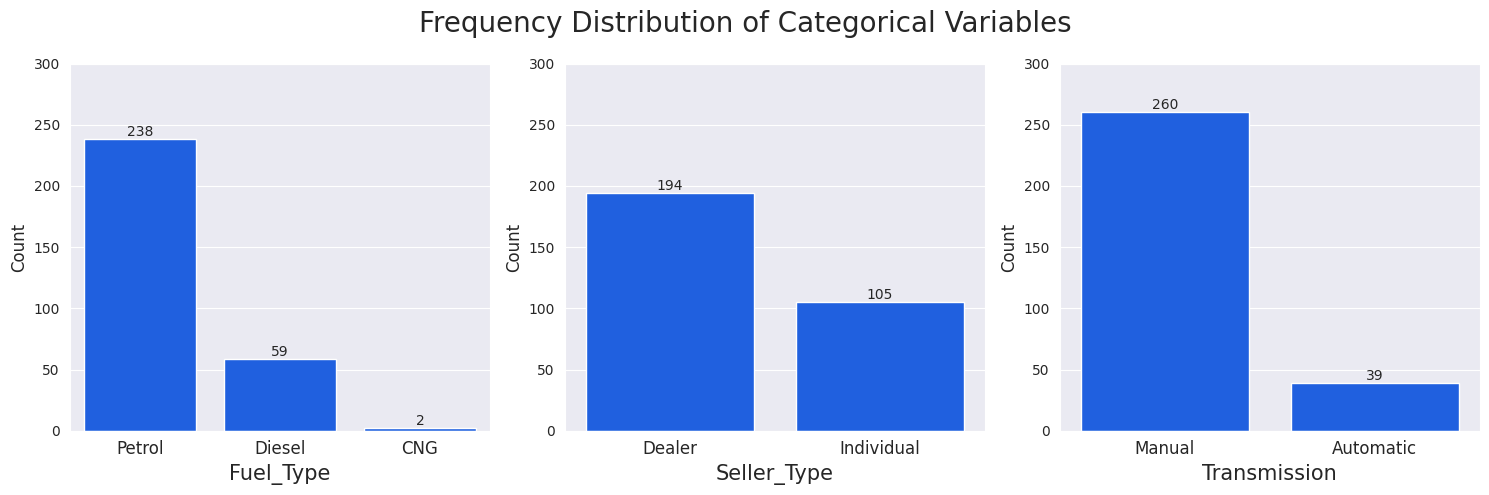

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
colors=['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

for i in range(len(CatCols)):
  graph= sns.countplot(x=CatCols[i],data=df1, ax=ax[i])
  ax[i].set_xlabel(CatCols[i], fontsize=15)
  ax[i].set_ylabel('Count', fontsize=12)
  ax[i].set_ylim([0,300])
  ax[i].set_xticklabels(ax[i].get_xticklabels(),fontsize=12)

  for cont in graph.containers:
    graph.bar_label(cont)




#for i in range (len(CatCols)):
  #graph = sns.countplot(x=CatCols[i], data=df1 , ax=ax[i])

  #ax[i].set_xlabel(CatCols[i], FontSize=15)
  #ax[i].set_ylabel('Count', FontSize=12)
  #ax[i].set_ylim([0.300])
  #ax[i].set_xticklabels(ax[i].get_xticklabels(), FontSize=12)
  #for cont in graph.containers:
    #graph.bar_label(cont)

plt.suptitle('Frequency Distribution of Categorical Variables' , fontsize=20)
plt.tight_layout()
plt.show()



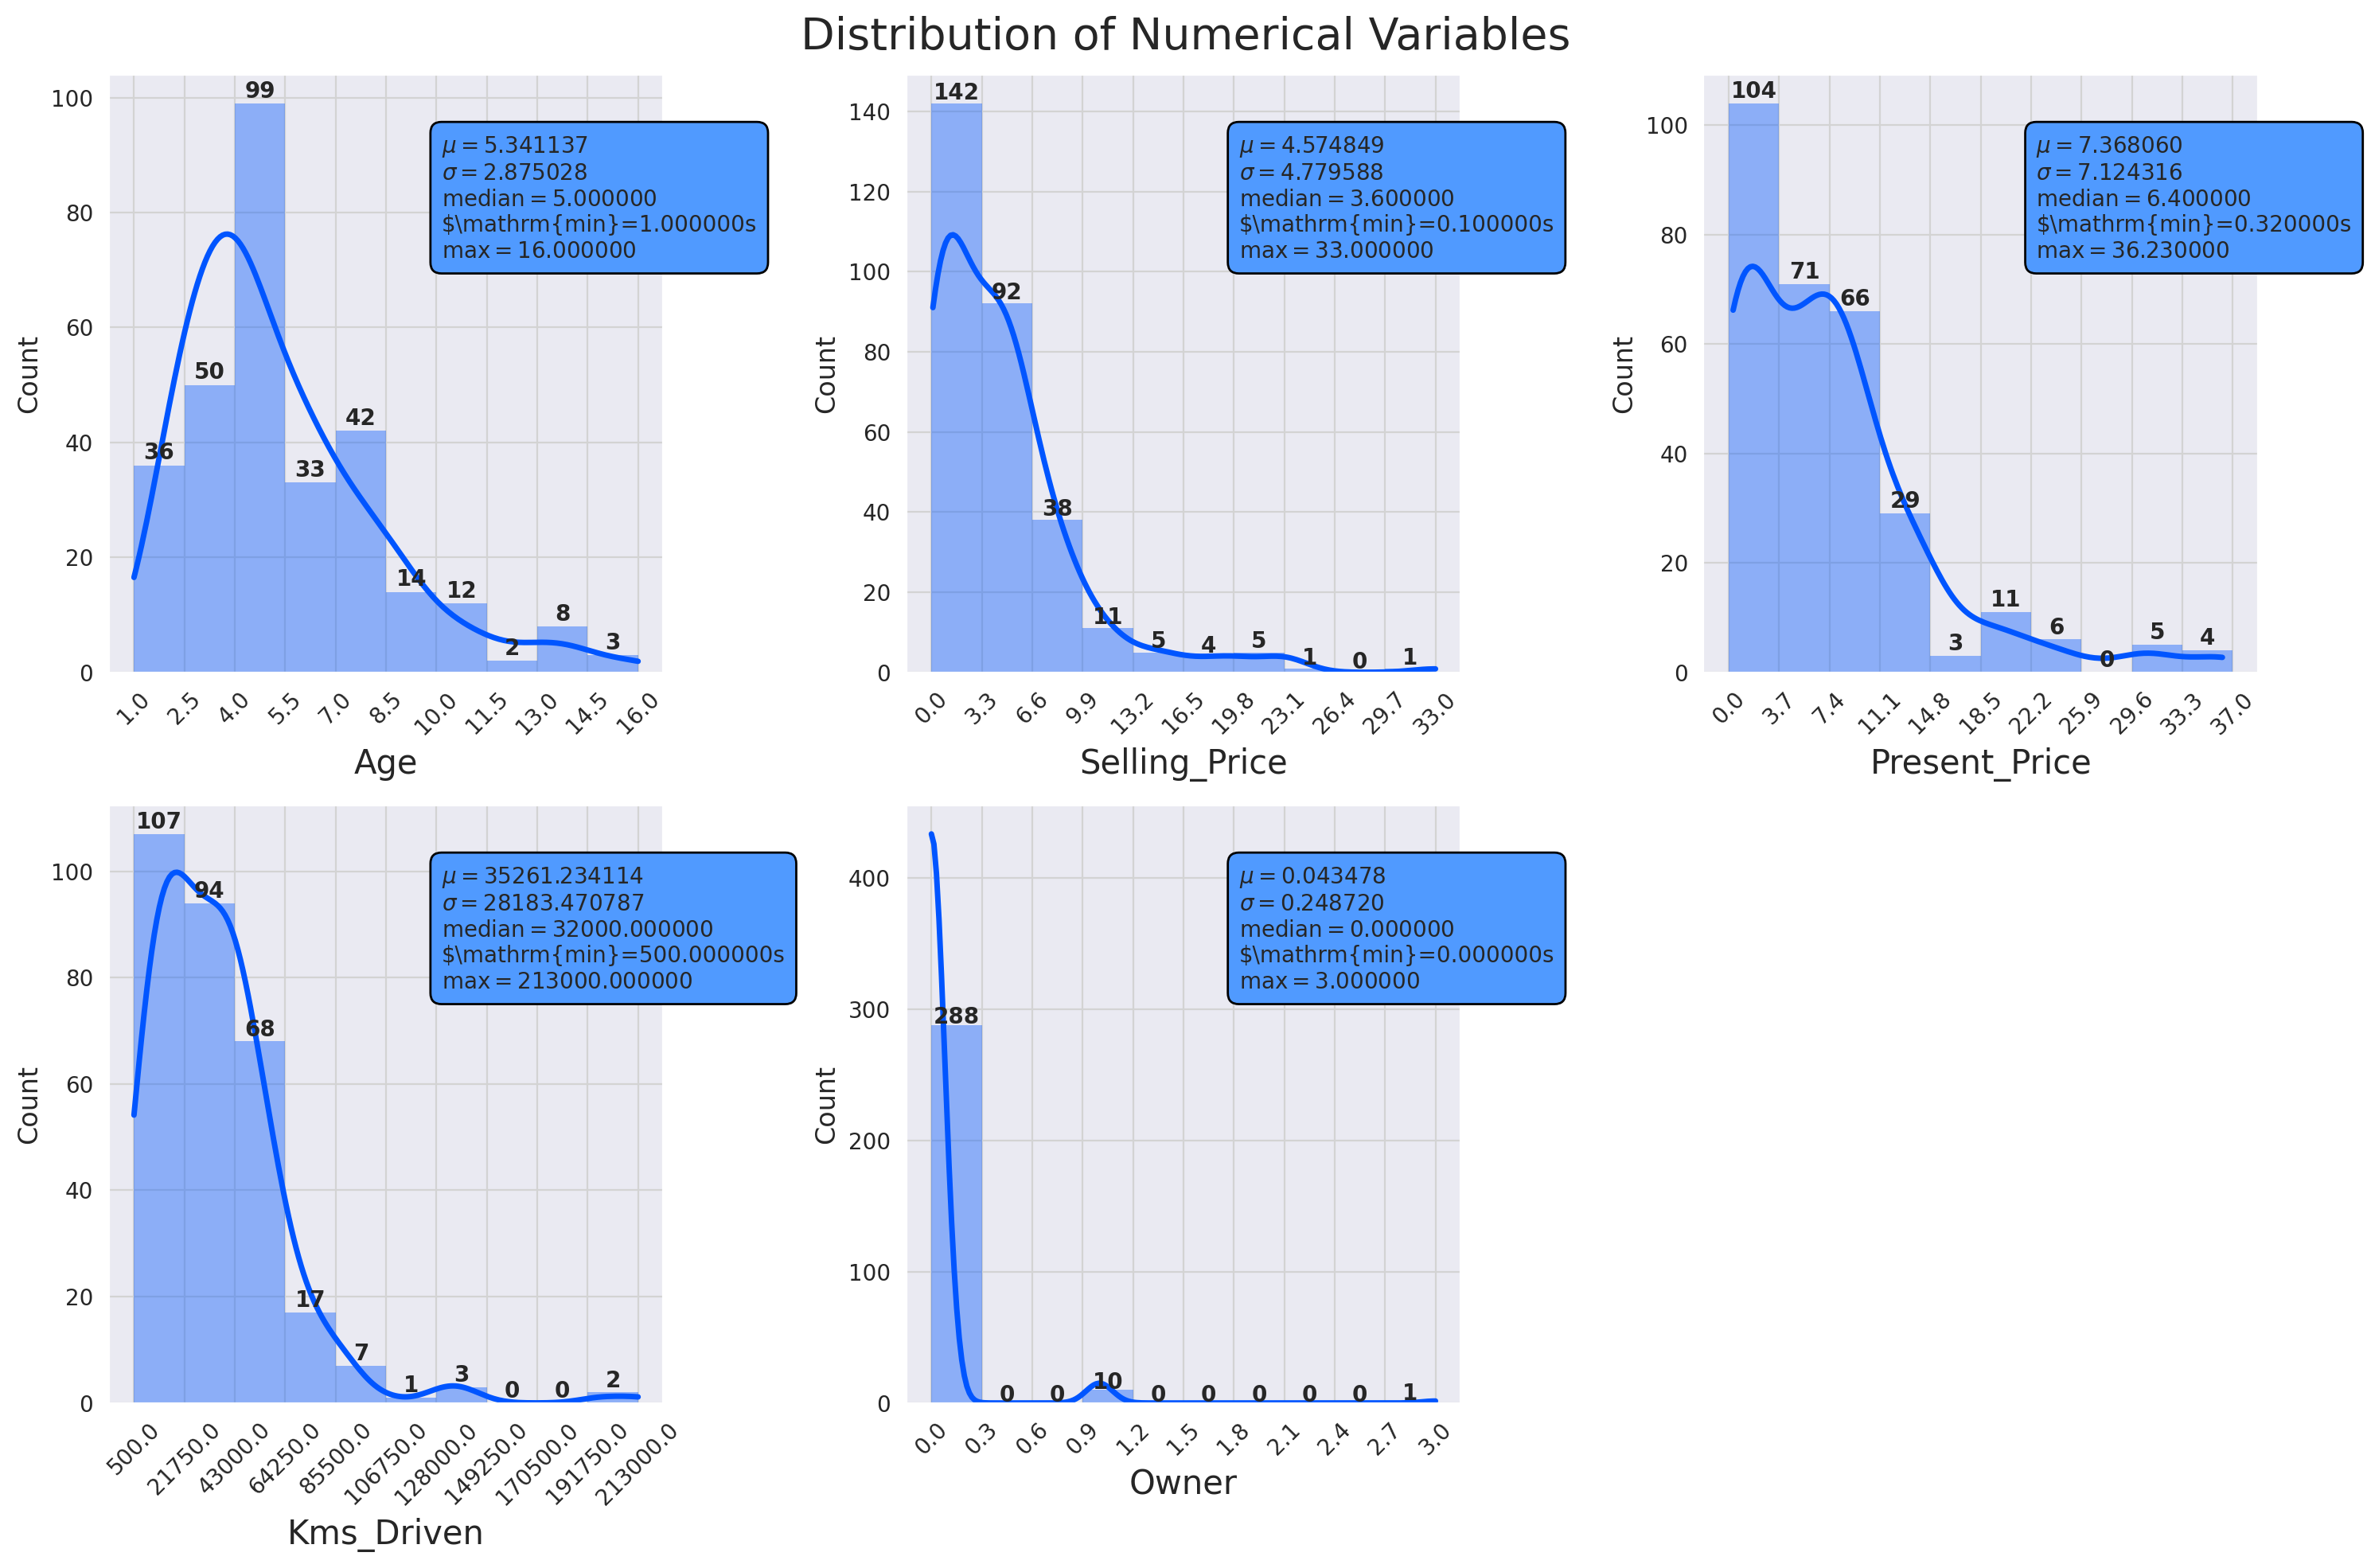

In [ ]:
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,10), dpi=200)
c='#0055ff'

for i in range(len(NumCols)):
  row=i//3
  col=i%3
  values, bin_edges = np.histogram(df1[NumCols[i]], range=(np.floor(df1[NumCols[i]].min()), np.ceil(df1[NumCols[i]].max())))
  graph= sns.histplot(data=df1, x=NumCols[i], bins= bin_edges, kde=True, ax=ax[row,col],edgecolor='none', color=c, alpha=0.4, line_kws={'lw':2.5})

  ax[row,col].set_xlabel(NumCols[i], fontsize=15)
  ax[row,col].set_ylabel('Count',fontsize=12)
 # ax[row,col].set_ylabel('Count', fontSize=12)
  ax[row,col].set_xticks(np.round(bin_edges,1))
  ax[row, col].set_xticklabels(ax[row,col].get_xticks(), rotation=45)
  ax[row,col].grid(color='lightgrey')

  for j,p in enumerate(graph.patches):
    ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),ha='center', fontsize=10, fontweight="bold")

  textstr= '\n'.join((r'$\mu=%2f$' %df1[NumCols[i]].mean(), r'$\sigma=%2f$' %df1[NumCols[i]].std() , r'$\mathrm{median}=%2f$' %np.median(df1[NumCols[i]]), r'$\mathrm{min}=%2fs' %df1[NumCols[i]].min(),  r'$\mathrm{max}=%2f$' %df1[NumCols[i]].max() ))
  ax[row, col].text(0.6 , 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10,verticalalignment ='top' , bbox=dict(boxstyle='round' , facecolor='#509aff' , edgecolor='black', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Numerical Variables' , fontsize=20)
plt.tight_layout()
plt.show()


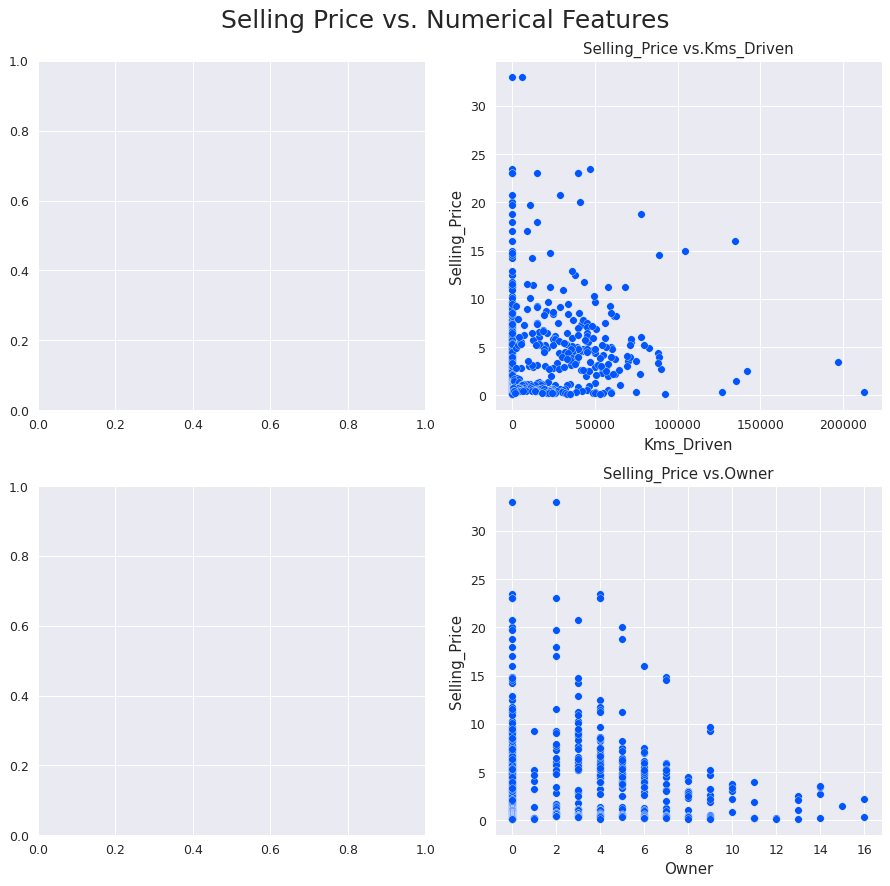

In [ ]:
fig, ax=plt.subplots(nrows=2 ,ncols=2, figsize=(10,10) , dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']
target= 'Selling_Price'
c='#0055ff'

for i in range (len(num_features)):
  row=i//2
  col%2
  ax[row,col].scatter(df1[num_features[i]], df1[target], color=c, edgecolors='w', linewidths=0.25)
  ax[row,col].set_title('{} vs.{}'.format(target, num_features[i]) , size=12)
  ax[row,col].set_xlabel(num_features[i] , size=12)
  ax[row,col].set_ylabel(target, size=12)
  ax[row,col].grid()

plt.suptitle('Selling Price vs. Numerical Features', size=20)
plt.tight_layout()
plt.show()

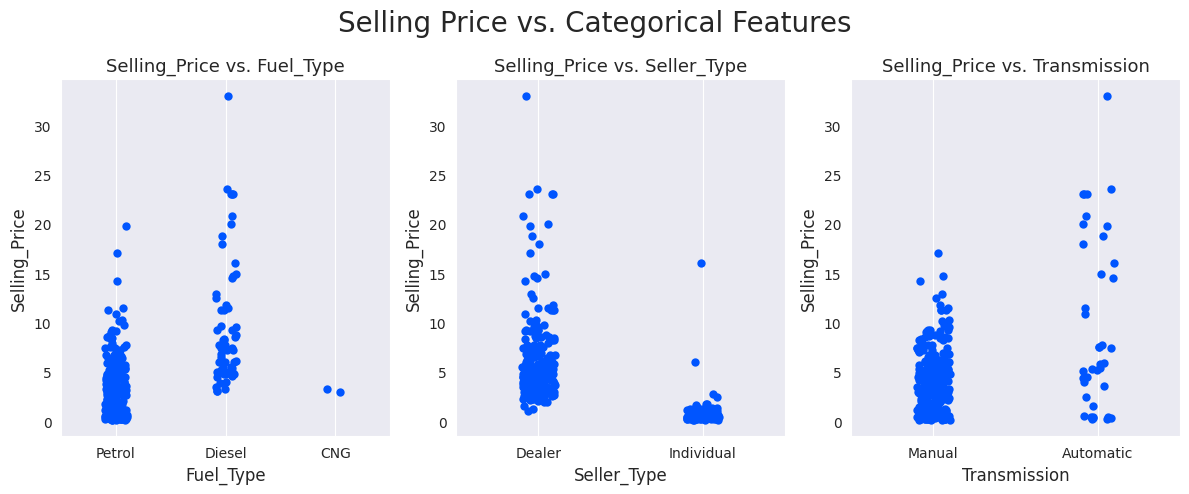

In [ ]:
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']  # Corrected column name
target = 'Selling_Price'
c = '#0055ff'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5), dpi=100)

for i in range(len(cat_features)):
    sns.stripplot(ax=axes[i], x=cat_features[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, cat_features[i]), size=13)
    axes[i].set_xlabel(cat_features[i], size=12)
    axes[i].set_ylabel(target, size=12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size=20)
plt.tight_layout()
plt.show()

TypeError: Legend.__init__() got an unexpected keyword argument 'bbox_toanchor'

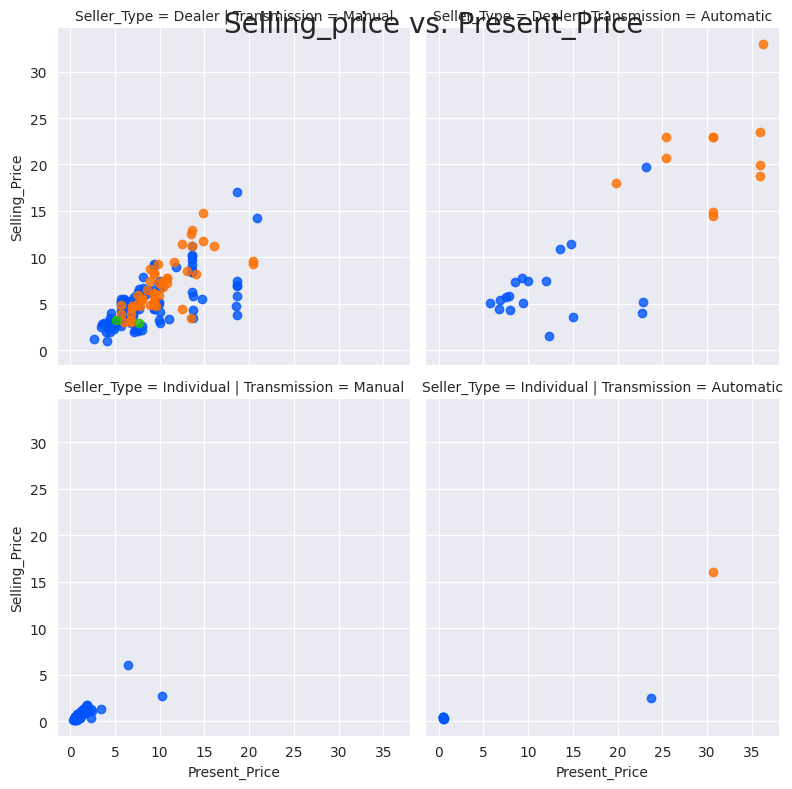

In [ ]:
graph= sns.lmplot(x='Present_Price', y='Selling_Price' , data=df1, fit_reg=False, row='Seller_Type', col='Transmission' , hue='Fuel_Type', palette=CustomPalette, height=4,aspect=1)

plt.suptitle('Selling_price vs. Present_Price', fontsize=20)
sns.move_legend(graph,"lower center ", bbox_toanchor=(1.05 , 0.5), ncol=1)
plt.tight_layout()
plt.show()

In [ ]:
CatCols=['Fuel_Type', 'Seller_Type', 'Transmission']
df1= pd.get_dummies(df1,columns=CatCols, drop_first=True)
df1.head(5)

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,False,True,False,True
1,6,4.75,9.54,43000,0,True,False,False,True
2,2,7.25,9.85,6900,0,False,True,False,True
3,8,2.85,4.15,5200,0,False,True,False,True
4,5,4.60,6.87,42450,0,True,False,False,True


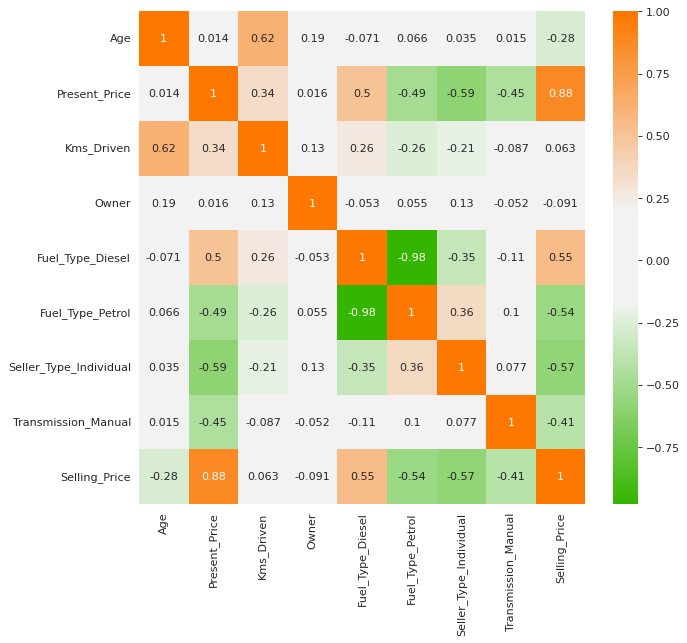

In [ ]:
target = 'Selling_Price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)

fig, ax = plt.subplots(figsize=(9, 8), dpi=80)

corr_matrix = pd.concat([df1.drop(target, axis=1), df1[target]], axis=1).corr()
ax = sns.heatmap(corr_matrix, annot=True, cmap=cmap)

plt.show()

In [ ]:
X=df1.drop('Selling_Price', axis=1)
y=df1['Selling_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print('X_train shape:' , X_train.shape)
print('X_test shape:' , X_test.shape)
print('y_train shape:' , y_train.shape)
print('y_test shape:' , y_test.shape)

X_train shape: (209, 8)
X_test shape: (90, 8)
y_train shape: (209,)
y_test shape: (90,)


In [ ]:
y_test_actual= y_test

In [ ]:
from re import S
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(
    data=np.append(linear_reg.intercept_, linear_reg.coef_),
    index=['Intercept'] + [col + " coef." for col in X.columns],
    columns=['Value']
)

# Sort the DataFrame by the 'Value' column
coeff_df_sorted = coeff_df.sort_values('Value', ascending=False)

# Display the sorted DataFrame
print(coeff_df_sorted)

                                 Value
Intercept                     4.302488
Present_Price coef.           3.492729
Fuel_Type_Diesel coef.        0.850217
Fuel_Type_Petrol coef.        0.207319
Transmission_Manual coef.     0.027375
Owner coef.                  -0.232722
Seller_Type_Individual coef. -0.377334
Kms_Driven coef.             -0.589672
Age coef.                    -0.936339


In [ ]:
def model_evaluation(model , X_test, y_test, model_name):
  y_pred = model.predict(X_test)

  MAE = metrics.mean_absolute_error(y_test, y_pred)
  MSE = metrics.mean_squared_error(y_test,y_pred)
  RMSE = np.sqrt(MSE)
  R2_Score= metrics.r2_score(y_test, y_pred)

  return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE', 'R2-Score'], columns=[model_name])

model_evaluation(linear_reg,X_test_scaled, y_test,'Linear Reg,')

,"Linear Reg,"
MAE,1.198867
MSE,3.714913
RMSE,1.927411
R2-Score,0.887245


**Result** **Visualization**

In [ ]:
y_test_pred = linear_reg.predict(X_test_scaled)
df_comp= pd.DataFrame({'Actual' : y_test_actual, 'Prediction': y_test_pred})

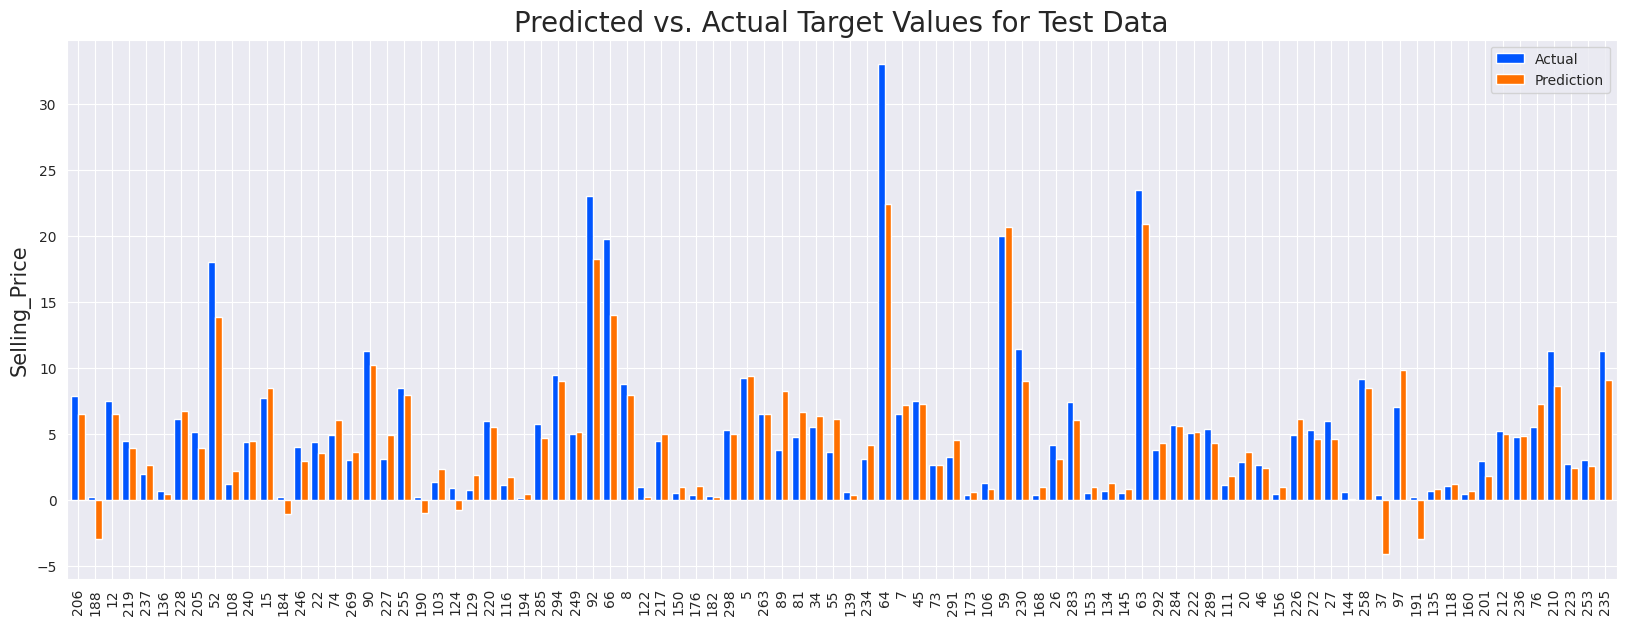

In [ ]:
def compare_plot(df_comp):

    if 'level_0' in df_comp.columns:
        df_comp = df_comp.drop(columns=['level_0'])

    df_comp.plot(y=['Actual', 'Prediction'], kind='bar', figsize=(20,7), width=0.8)

    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)

    plt.show()

compare_plot(df_comp)